<a href="https://colab.research.google.com/github/16shulockm/robotics_556/blob/main/Copy_of_ME556_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we are going to use the Robotics toolbox for python.
The first cell handles the install in python. Below you will find a citation for the toolbox and links to the paper and github repo
References:

[1] *Corke, P. and Haviland, J.*, 2021. **Not your grandmother’s toolbox--the Robotics Toolbox reinvented for Python**. IEEE International Conference on Robotics and Automation (ICRA), pp.11357--11363. [[**Paper**](https://ieeexplore.ieee.org/document/9561366)] [[**Github**](https://github.com/petercorke/robotics-toolbox-python)]

In [1]:
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install roboticstoolbox-python>=1.0.2
    !pip install --no-deps rvc3python
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML

%matplotlib widget
import matplotlib.pyplot as plt

# add RTB examples folder to the path
import sys, os.path
import RVC3 as rvc
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# helper function to run bdsim in a subprocess and transfer results using a pickle file
import pickle
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool+".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print(cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# ------ standard imports ------ #
import numpy as np
from scipy import optimize
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
import roboticstoolbox as rtb

Running on CoLab
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 2.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
print(trotz(0,'deg'))

[[       1        0        0        0]
 [       0        1        0        0]
 [       0        0        1        0]
 [       0        0        0        1]]


### Problem 1:

Define a function that takes as input a vector $\theta$ of the joint configuration and a link number $n$ of the 3D robot shown below and returns the pose $n$th link and nth joint transform. Assume the $z$ is up direction and $y$ is into the page. Use the function to find the pose of the end-effector at $\theta=[0,0,0,0,0,0,0]deg$ and $\theta=[0.,45.,0.,-45.,0.,180.,0.]deg$ . You are encouraged to use the *roboticstoolbox-python* to setup the transformation matrices.

You can use the code below that computes the forward kinematics of the robot in Lecture as a starting point. In 3D, you will want to use the function *trotx, troty,trotz, transl* or *SE3.Trans,SE3.Rx,SE3.Ry,SE3.Rz* from the robotics toolbox package.

**Turn in: A screen shot of your function and the outputs for each $\theta$.**



In [ ]:
#Assume each member of ro
def panda_ee(theta, n):
  T1 = transl(0., 0., 0.333) @ trotz(theta[0],'deg') #0 to 1 matrix
  T2 = trotx(-90,'deg') @ trotz(theta[1],'deg') #no translation between 1 and 2, hence identity.
  T3 = transl(0., -0.316, 0.) @ trotx(90.,'deg') @ trotz(theta[2], 'deg')
  T4 = transl(0.088, 0., 0.) @ trotx(90,'deg') @ trotz(theta[3], 'deg')
  T5 = transl(-0.088, 0.384, 0.) @ trotx(-90., 'deg') @ trotz(theta[4], 'deg')
  T6 = trotx(90,'deg') @ trotz(theta[5],'deg')
  T7 = transl(0.088, 0., 0.) @ trotx(90,'deg') @ trotz(theta[6],'deg')
  T8 = transl(0., 0., 0.107) #final translation of gripper

  #boolean statements for number of links
  if n == 1:
    T=T1
  elif n == 2:
    T=T1 @ T2
  elif n == 3:
    T = T1 @ T2 @ T3
  elif n == 4:
    T = T1 @ T2 @ T3 @ T4
  elif n == 5:
    T = T1 @ T2 @ T3 @ T4 @ T5
  elif n == 6:
    T = T1 @ T2 @ T3 @ T4 @ T5 @ T6
  elif n == 7:
    T= T1 @ T2 @ T3 @ T4 @ T5 @ T6 @ T7
  else:
    T= T1 @ T2 @ T3 @ T4 @ T5 @ T6 @ T7 @ T8 # end effector -> last link
  return T

theta1=np.array([0,0,0,0,0,0,0]) #home position
theta2=np.array([0., 45., 0., -45., 0., 180., 0.]) #second theta input

print('Theta = 0s')
Tee1=panda_ee(theta1, 8)
print(Tee1)

Tee2 = panda_ee(theta2, 8)
print(' ')
print('Second Theta Input');
print(Tee2)





Theta = 0s
[[       1        0        0    0.088]
 [       0       -1        0        0]
 [       0        0       -1    0.926]
 [       0        0        0        1]]
 
Second Theta Input
[[       0        0        1   0.7767]
 [       0       -1        0        0]
 [       1        0        0   0.6702]
 [       0        0        0        1]]


### Problem 2:

Using the roboticstoolbox model for the same robot as problem 1(e.g., *rtb.models.ETS.Panda()*), find two different vectors $\theta$ that results in the end-effector pose. You'll want to use the documentation for the library to use the methods available in the library. https://petercorke.github.io/robotics-toolbox-python/
$$T_{ee}=\left[\begin{array}{cccc} 0 & 0 &0&0.5\\
0 & 0 & 0 & 0.3\\
0&0&1&0.7\\ 0&0&0&1
\end{array}\right]$$.
**Turn in: A screenshot of the code you used to perform the inverse kinematics and the two resulting $\theta$ vectors**

**Note:** You can view these configurations using the *plot* member of the class *rtb.models.ETS.Panda()*

In [15]:
panda=rtb.models.ETS.Panda() #This is a class that includes functions for forward kinematics, inverse kinematics, and plotting a 3d model of the robot
Tep = np.array([[1., 0., 0., 0.5],
                [0., 1., 0., 0.3],
                [0., 0., 1., 0.7],
                [0., 0., 0., 1.]]) #end effector given

q01 = np.array([0., 0., 0., 0., 0., 0., 0.]) # initial guess 1
q02 = np.array([-pi/2., 0., 0., 0., 0., 0., 0.]) # initial guess 2

q1 = panda.ik_NR(Tep, q0 = q01)
print('First Pose')
print(q1)
#panda.plot(q1[0])

q2 = panda.ik_NR(Tep, q0 = q02)
print('\nSecond Pose')
print(q2)
#panda.plot(q2[0])


First Pose
(array([   -1.97,  -0.9813,   -1.211,    1.051,    0.893,    1.594,   0.5618]), 1, 144, 10, 9.877974582106774e-07)

Second Pose
(array([ -0.6677,   0.5332,    1.354,   -1.973,    2.557,    1.118,  -0.1493]), 1, 162, 9, 7.585724694958244e-08)


### Problem 3:

Using gradient descent, compute the parameters $r$ and $L$ given the following control inputs and corresponding state measurements. The data was collected at 100Hz.

**Turn in: A screenshot of the code you used to numerically and symbolically evaluate the solution and its output.**

In [4]:
#You will need to download the data_models.txt file to your computer
!rm -rf '/content/HW2p3data.txt' #if you need to reupload the file for any reason, this line removed the local file
from google.colab import files
uploaded = files.upload()

Saving HW2p3data.txt to HW2p3data.txt


{'HW2p3data.txt': b'7.500000000000000000e+00,7.500000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00\n7.500000000000000000e+00,7.500000000000000000e+00,3.504352824058369897e-01,-1.615616760379064848e-02,6.387320764558719437e-03\n7.500000000000000000e+00,7.500000000000000000e+00,6.139886456089926892e-01,6.443657891583332020e-02,8.126481566158799685e-02\n7.500000000000000000e+00,7.500000000000000000e+00,8.765404799205611663e-01,-6.247001504058102145e-02,-1.302126191089482063e-02\n7.500000000000000000e+00,7.500000000000000000e+00,1.192622479857666118e+00,-2.400913125532561088e-02,-8.542126590344412129e-02\n7.500000000000000000e+00,7.500000000000000000e+00,1.555094146756546003e+00,-2.504493846195770135e-03,1.270970327356850393e-01\n7.500000000000000000e+00,7.500000000000000000e+00,1.860482117230254362e+00,9.695375974887314452e-02,-1.486053484038262797e-02\n7.500000000000000000e+00,7.500000000000000000e+00,2.166045651505320802e+00,9.86795523000335

[   536.6   -284.3]
[   199.5     6.15]
[   61.21   -3.308]
[   57.66   -3.109]
[   54.66   -2.941]
[   52.09   -2.797]
[   49.85   -2.671]
[   47.87   -2.559]
[   46.11    -2.46]
[   44.53   -2.371]
[   43.09    -2.29]
[   41.79   -2.216]
[   40.59   -2.149]
[   39.49   -2.087]
[   38.47   -2.029]
[   37.52   -1.976]
[   36.64   -1.926]
[   35.81   -1.879]
[   35.04   -1.835]
[   34.31   -1.794]
[   33.63   -1.756]
[   32.98   -1.719]
[   32.36   -1.685]
[   31.78   -1.652]
[   31.23   -1.621]
[    30.7   -1.591]
[    30.2   -1.563]
[   29.72   -1.535]
[   29.26    -1.51]
[   28.82   -1.485]
[    28.4   -1.461]
[   27.99   -1.438]
[    27.6   -1.416]
[   27.23   -1.395]
[   26.87   -1.375]
[   26.52   -1.356]
[   26.18   -1.337]
[   25.86   -1.319]
[   25.55   -1.301]
[   25.25   -1.284]
[   24.95   -1.267]
[   24.67   -1.252]
[   24.39   -1.236]
[   24.13   -1.221]
[   23.87   -1.207]
[   23.62   -1.192]
[   23.37   -1.179]
[   23.13   -1.165]
[    22.9   -1.153]
[   22.68    -1.14]


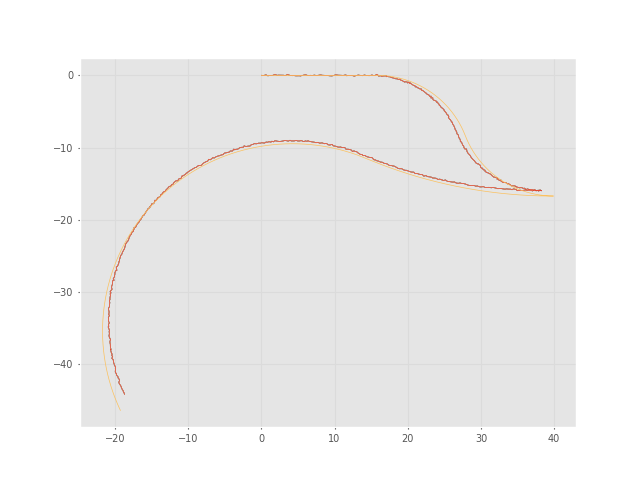

In [26]:
data=np.genfromtxt('HW2p3data.txt',delimiter=',') #import data
#initialize
u=data[:,:2];
xhat=data[:,2:];
DT=1./100.
T = DT*len(xhat)
Q=.01*np.diag([2.,2.,1.]) #weights
#Q=10*np.eye(3);

#need to define a function to compute the cost
def modeldd(xup): # x,y,theta,ur,ul,r,L
  B = np.array([[np.cos(xup[2]), np.cos(xup[2])], [np.sin(xup[2]), np.sin(xup[2])], [1/xup[6], -1/xup[6]]])
  xdot = xup[5] * B @ xup[3:5]
  return xdot

def lp(x, xhat):
  return np.transpose(x-xhat) @ Q @ (x-xhat) #return lp

def cost(x,u,p):
  J=0.
  r=p[0];
  L=p[1];
  x=xhat[0];
  for i in range(len(u)):
    xupvec = np.hstack((x,u[i],[r],[L]))
    x = x + modeldd(xupvec) * DT
    J = J + lp(x, xhat[i]) * DT;
  return J

xuptest=np.hstack((xhat[0],u[0],[3.],[5.]))

#print(modeldd(xuptest))
#print(cost(xhat,u,np.array([3.,5.])))


#need to define a function to compute the gradient
def Dxlp(x, u, p):
  r=p[0];
  L=p[1];
  x = xhat[0];
  dxlp = 0;
  for i in range(len(u)):
    xupvec = np.hstack((x,u[i],[r],[L]))
    x = x + modeldd(xupvec) * DT
    dxlp = dxlp + (2 * np.transpose((x - xhat[i])) @ Q) * DT
  return dxlp

def geq(xup, g): #x,y,theta,ur,ul,r,L and then g
  gdot =xup[5] * np.array([[0., 0., (-(xup[3]+xup[4]) * np.sin(xup[2]))], [0., 0., ((xup[3]+xup[4]) * np.cos(xup[2]))], [0., 0., 0.]]) @ g + np.array([[((xup[3]+xup[4])*np.cos(xup[2])), 0.], [((xup[3]+xup[4])*np.sin(xup[2])), 0.], [((xup[3]-xup[4])/xup[6]), xup[5]*(xup[4]-xup[3])/xup[6]**2]])
  g = g + gdot * DT
  return g #outputs new g

def grad(x, u, p):
  Jdp = np.array([0, 0])
  r=p[0];
  L=p[1];
  x=xhat[0];
  g=np.zeros((3,2))
  dxlp = Dxlp(x, u, p) #find dxlp, which has an integration of time in it. Function above

  for i in range(len(u)):
    xupvec = np.hstack((x,u[i],[r],[L]))
    Jdp = Jdp + dxlp @ g *DT
    x = x + modeldd(xupvec) * DT
    g = geq(xupvec, g)
  return Jdp

print(grad(xhat,u,np.array([3.,5.])))

#initializations
r0 = 3.5
L0 = 13.
pvec=np.array([r0,L0])
i=0
eps_stop=0.1; #stop magnitude
gamma = .0001; #step size
gradient = grad(xhat, u, pvec) #initialize gradient

while np.linalg.norm(gradient)>eps_stop and i<100:
  #compute gradient
  gradient = grad(xhat, u, pvec)
  #print(gradient)
  #new p vector
  pvec = pvec - gamma * gradient * cost(xhat, u, pvec)
  #iterate
  i=i+1;

#make sure to print your final r and L
print('The final value of r and L are:')
print(pvec)

#check  solution
def soln(u, p): #creates array of positional values
  x = np.array([xhat[0]])
  for i in range(len(u)):
    xupvec = np.hstack((x[i], u[i], p[0], p[1]))
    x_next = x[i] + modeldd(xupvec) * DT
    x = np.vstack((x, x_next))
  return x

sol3 = soln(u, pvec) #calculate simulated values
xsol3 = sol3[:,0]  #your simulated x values with your final r and L
ysol3 = sol3[:,1]  #your simulated y values with your final r and L

import matplotlib.pyplot as plt
plt.plot(xsol3,ysol3)
#plt.plot(xhat[:,0],xhat[:,1])
plt.show()


### Problem 4:

Complete the A* algorithm using the template below and use it co compute path from *xstart* to *xgoal*. Note that the first chunk of code is just the setup for the problem. In the Colab notebook, I put this in a seperate cell from the A* template.


**Turn in: The code you used to complete the A* search and a plot of the path that your code found.**

robot radius: 2.369401450006358


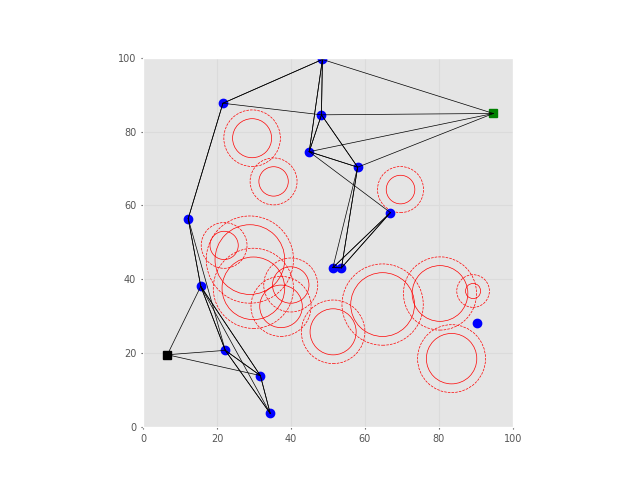

In [ ]:
#############SETUP CODE MODIFY WITH CAUTION################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

np.random.seed(39) #25,31,32*,39
nNodes=20
nNeighbors=nNodes-3 #used to limit the number of neighbors each node has to 5
nObject=np.random.randint(4,15) #pick number of objects
rObj=np.random.uniform(2,10,nObject)
pObj= np.random.uniform(10,90,(nObject,2))
xstart=np.random.uniform(0,30,2)
xgoal=np.random.uniform(70,100,2)
r=np.random.uniform(2,5) #pick value for radius of robot
#remove any obstacles that cover the start or goal
del_ind = []
for i in range(nObject):
    if np.linalg.norm(xstart-pObj[i])<rObj[i]+r or np.linalg.norm(xgoal-pObj[i])<rObj[i]+r:
        del_ind.append(i)
pObj = np.delete(pObj,del_ind,axis=0)
rObj = np.delete(rObj,del_ind)
nObject=len(rObj)
#now add some random nodes
nodetemp=np.random.uniform(0,100,(nNodes,2))
#nodex,nodey=np.mgrid[5:100:35,5:100:35]               # These 2 lines allow
#nodetemp=np.vstack((nodex.flatten(),nodey.flatten())).T #you to set up grid nodes
node=np.vstack((xstart,nodetemp,xgoal))
#remove any nodes that are inside an obstacle
del_ind2 = []
for i in range(len(node)):
    for j in range(len(rObj)):
        if np.linalg.norm(node[i]-pObj[j])<rObj[j]+r:
            del_ind2.append(i)
node = np.delete(node,del_ind2,axis=0)
nNodes=len(node)
nNbr = nNodes-4
#find all edges and their weights but start with a row
#let's set up a function to check for edge intersections with obj

def does_intersect_circle(P1, P2, C, rad):
    d = P2 - P1
    f = P1 - C
    t = np.dot(C - P1, P2 - P1) / np.dot(P2 - P1, P2 - P1)
    t = max(0, min(1, t))
    closest_point = P1 + t * d
    distance = np.linalg.norm(closest_point - C)
    # Check if this distance is less than or equal to the radius
    return distance < rad

edges = np.zeros((len(node),len(node)))
for k in range(len(node)):
  for j in range(len(node)):
    if k==j:
        edges[k,j]=0.
    else:
      flag =False;
      edgecounter = 0;
      for i in range(nObject):
       if does_intersect_circle(node[k],node[j],pObj[i],rObj[i]+r):
          flag=True
      if flag==True:
          edges[k,j]=np.inf
      else:
          edges[k,j]=np.linalg.norm(node[k]-node[j])
      edges[k,np.argsort(edges[k])[-nNbr:]]=np.inf  #'remove' longest edges



#print('robot radius:',r)
#print('object positions:',pObj)
#print('object radii:',rObj)
#print('start position:',xstart)
#print('goal position:',xgoal)
fig, ax = plt.subplots()
plt.plot(xstart[0],xstart[1],'ks')
plt.plot(xgoal[0],xgoal[1],'gs')
plt.plot(node[1:-1,0],node[1:-1,1],'bo')
for i in range(nObject):
    ax.add_patch(Circle(pObj[i],rObj[i],color='r',fill=False))
    ax.add_patch(Circle(pObj[i],rObj[i]+r,color='r',fill=False,linestyle='--'))

for j in range(len(node)):
  for i in range(len(node)):
    if edges[j,i]==0 or edges[j,i]==np.inf:
      dummy=1
    else:
      plt.plot([node[j,0],node[i,0]], [node[j,1],node[i,1]], 'k')

    #do nothing

plt.xlim(0,100)
plt.ylim(0,100)
plt.gca().set_aspect('equal')
plt.show()
 #Setup code end

In [ ]:
# I suggest using this cell to actually write your A* search
"""Definitions
 The array node is the list of nodes.
 The matrix edges is nNodes by nNodes and contains edge weights
 so that edges[i,j] is the weight of the edge from node i to node j.
 edges[i,i]=0 and if there is no edge between i and j, edges[i,j]=np.inf.
"""
#define optimistic cost to go
#def h(node):
  #return optimistic cost to go
#initializations
open = [[0,0]]
pastcost=np.zeros(nNodes)
pastcost.fill(np.inf)
pastcost[0]=0
parent=(nNodes+1)*np.ones(nNodes)
closed=[]

#while len(open)>=1:
  #check if current =g
  #endif
  # for each neighbor loop
    #if neighbor is in closed set
      #skip it
    #endif
    #compute the tentative cost
    #if tentative cost is less than the pastcost[n]
      #update past cost
      #update parent
      #compute cost estimate as sum of pastcost and costtogo
      #add neighbot to open if it's not already in open
      #sort open with according to new cost estimate
        #you may want to use something like open=sorted(open,key=lambda x: x[1])
    #endif
  #endfor
#endwhile

1